안녕하세요! 데이크루 1기로 활동 중인 sssssun입니다!

저번 게시물에 이어 소개할 파이썬 라이브러리는 **sklearn** 입니다.

sklearn은 가장 많이 사용되는 **머신러닝 라이브러리**인데요.

이번 포스팅을 작성할 때도 sklearn을 처음 배우는 사람의 입장에서 포스팅을 작성하며 하나하나 풀어쓰려고 했습니다..!

(혹시 잘못된 이해가 있다면 ..ㅎ 댓글로 알려주세요..!)

sklearn은 지도 학습의 두 축인 분류(Classification)와 회귀(regression)의 다양한 알고리즘을 제공하고 있는데요.

지난 포스팅에서는 iris 데이터셋으로 분류 알고리즘을 활용한 모델을 만들어 보았습니다.

이번 포스팅에서는 sklearn의 내장 데이터셋인 당뇨병 진행도 데이터셋을 활용하여 회귀 알고리즘 모델을 구현해볼 예정입니다!^^

먼저, sklearn과 다른 필수 라이브러리들을 import 해주었습니다.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

당뇨병 진행도 데이터셋을 import 해주었습니다.

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

어떤 변수와 메서드를 가지는지 확인해보았습니다.

In [3]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

diabetes가 어떤 데이터셋인지 알아봅시다!

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

피쳐들이 각각 뭘 의미하는지 알 수 있네요!

- age : 나이
- sex : 성별
- bmi : 체질량지수
- bp : 평균 혈압
- s1 : 혈중 총콜레스테롤
- s2 : 저밀도 지질단백질
- s3 : 고밀도 지질단백질
- s4 : 총 콜레스테롤 수치
- s5 : 혈중 트리글리세라이드 수치
- s6 : 혈당 수치

또한 타겟은 1년 후의 당뇨병이 진전된 정도를 나타낸다고 합니다.

피처는 앞서 언급했듯이 다음의 10가지가 있습니다.

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

타겟은 다음과 같은 수치형 데이터입니다. 

분류 모델에서 쓰였던 iris 데이터셋의 타겟과는 확실히 다른 유형입니다.

In [6]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

diabetes 데이터셋을 데이터프레임으로 만들어 보기 쉽게 만들어 주었습니다.

그리고 target도 열으로 만들어 추가해주었습니다.

In [7]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


데이터 개수를 확인합니다.

In [8]:
diabetes_df.info

<bound method DataFrame.info of           age       sex       bmi  ...        s5        s6  target
0    0.038076  0.050680  0.061696  ...  0.019908 -0.017646   151.0
1   -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204    75.0
2    0.085299  0.050680  0.044451  ...  0.002864 -0.025930   141.0
3   -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362   206.0
4    0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641   135.0
..        ...       ...       ...  ...       ...       ...     ...
437  0.041708  0.050680  0.019662  ...  0.031193  0.007207   178.0
438 -0.005515  0.050680 -0.015906  ... -0.018118  0.044485   104.0
439  0.041708  0.050680 -0.015906  ... -0.046879  0.015491   132.0
440 -0.045472 -0.044642  0.039062  ...  0.044528 -0.025930   220.0
441 -0.045472 -0.044642 -0.073030  ... -0.004220  0.003064    57.0

[442 rows x 11 columns]>

효과적인 회귀 분석을 위해 변수별로 상관계수를 도출해주어 연관성이 높은 피처를 가려내겠습니다.

In [9]:
diabetes_corr = diabetes_df.corr()

In [10]:
diabetes_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


회귀 분석 대상인 피처들과 target 사이의 상관 계수만 슬라이싱하였고, abs()를 통해 양수로 바꿔주었습니다.

그리고 상관 계수가 큰 순서대로 정렬해주었습니다.


In [11]:
cor_order = diabetes_corr.loc[:'s6', 'target'].abs().sort_values(ascending=False)

In [12]:
cor_order

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64

피처들과 타겟 간의 상관계수가 높은 편은 아니네요..

상관계수가 0.5를 넘은 bmi와 s5를 대상으로 산점도와 회귀선을 그려봅시다.

In [13]:
names = ['target', 'bmi', 's5']
diabetes_df_l = diabetes_df.loc[:, names]

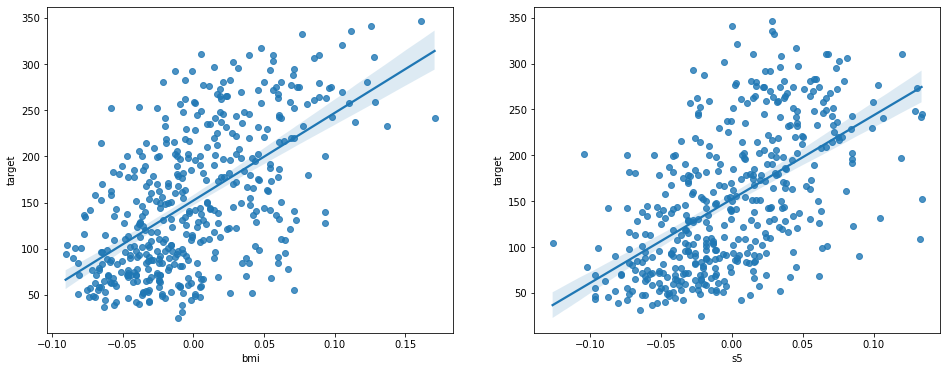

In [14]:
plt.figure(figsize=(16, 6))
for i, name in enumerate(names[1:]):
  ax=plt.subplot(1, 2, i+1)
  sns.regplot(x=name, y=names[0], data=diabetes_df_l, ax=ax)
plt.show()

피처 리스트를 만들어 세로축 변수엔 타겟값을 넣어 피처별로 회귀선 그래프를 그려주었습니다.

선형 관계가 뚜렷하진 않지만 존재하는 것을 볼 수 있습니다.

이제 머신러닝을 통해 예측 모델을 구현해봅시다!

상관 계수 값이 가장 큰 bmi와 s5를 학습 데이터셋으로 설정해주었습니다.

먼저, 데이터셋을 학습용 데이터셋과 테스트용 데이터셋을 분리해주어야겠죠?

이번에도 train_test_split 함수를 사용했습니다.

x_data는 bmi와 s5 피처들의 데이터값을, y_data는 target의 데이터값으로 지정하고, 데이터셋을 나눠주었습니다.

In [17]:
from sklearn.model_selection import train_test_split

x_data=diabetes_df.loc[:, ['bmi', 's5']]
y_data=diabetes_df.loc[:, 'target']

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

각각 다음과 같은 개수로 데이터가 나눠졌네요!

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 2) (353,)
(89, 2) (89,)


회귀 분석을 위해 **선형 회귀(LinearRegression)** 알고리즘을 이용하겠습니다.

LinearRegression을 객체로 생성해주고, 학습용 데이터셋으로 학습을 진행해줍니다.

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**coef_**는 **회귀 계수(기울기 값**)이고, **intercept_**는 **절편값**을 의미합니다.

In [22]:
print(np.round(lr.coef_, 2))
print(np.round(lr.intercept_, 2))

[696.73 604.62]
151.73


그리고 predict로 예측된 결과값을 지정해줍니다.

In [ ]:
pred = lr.predict(X_test)

예측값과 실제 결과값이 얼마나 들어맞는지 보기 위해 산점도를 그려보았습니다.

먼저 bmi 피처의 산점도입니다. 

실제 테스트용 데이터셋의 결과값(y_test)을 파란점으로, 모델을 통한 예측값(pred)을 빨간점으로 나타냈습니다.

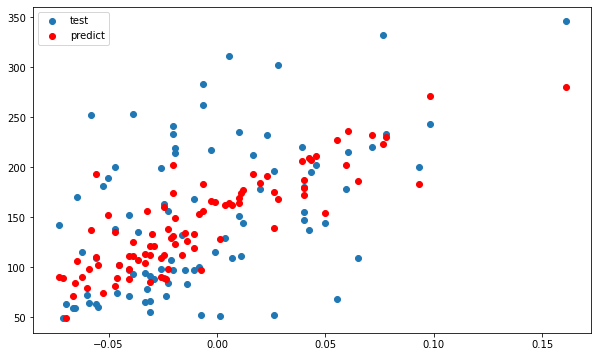

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, label='test')  
plt.scatter(X_test['bmi'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

차이가 꽤 있지만 .. 어느 정도 선형성은 비슷하네요!

다음은 s5 피처의 산점도를 그려보았습니다.

마찬가지로, 실제 테스트용 데이터셋의 결과값을 파란점으로, 모델을 통한 예측값을 빨간점으로 나타냈습니다.

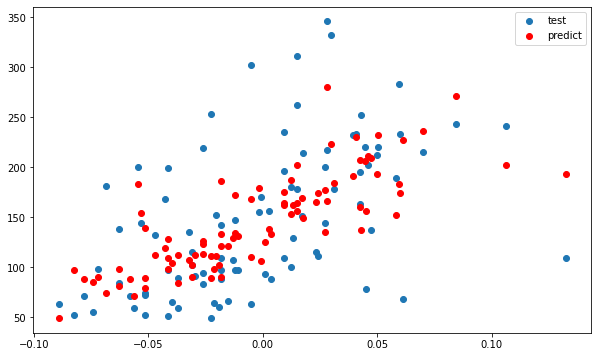

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['s5'], y_test, label='test')  
plt.scatter(X_test['s5'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

이제 모델이 적절하게 예측하는지 평가해보겠습니다.

모델은 실제 결과값과 모델의 예측값의 차이인 잔차가 작을수록 모델의 성능이 좋다고 평가합니다.

회귀모델의 성능을 평가하는 지표는 **MAE, MSE, RMSE** 등이 있는데요. 

간단하게 설명하면 다음과 같습니다.
- MAE(Mean Absolute Error)	: 잔차의 절대값을 평균한 값
- MSE(Mean Squared Error)	: 잔차의 제곱을 평균한 값
- RMSE(Root Mean Squared Error)	: MSE의 제곱근


**sklearn.metrics** 모듈에는 다양한 모델 성능 평가 메서드가 존재하며, 이번에는 MSE에 제곱근을 하여 RMSE 지표를 활용하기 위해 **mean_squared_error** 메서드를 import 해주었습니다. 

mean_squared_error() 함수에 실제 데이터값, 예측값을 순서대로 넣어주면 MSE 값을 구해줍니다.

훈련용 데이터셋의 MSE 와, 테스트용 데이터셋의 MSE를 모두 구해보았습니다.

In [28]:
from sklearn.metrics import mean_squared_error

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred) 
test_mse = mean_squared_error(y_test, test_pred)

제곱근하여 RMSE 를 구해줄 수 있습니다.

In [26]:
print("train data set RMSE :", round(train_mse**0.5, 3))
print("test data set RMSE :", round(test_mse**0.5, 3))

train data set RMSE : 56.517
test data set RMSE : 57.045


이렇게 이번 포스팅에서는 회귀 알고리즘을 활용하여 모델을 구현해보았습니다.

개인적으로는 분류 모델보다는 .. 더 어렵게 느껴졌습니다.

sklearn을 배워보고 싶으신 분들은 읽어보셔도 좋을 것 같습니다.

읽어주셔서 감사합니다!^_^